# Housing Price Prediction

### Frame

Predict the sale price of the house, given various features of the house

### Acquire 

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv("http://bit.do/df-housing")

In [4]:
df_train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,FireplaceQu,LotFrontage
0,208500,7,1710,2,856,2,2003,NaN,65.0
1,181500,6,1262,2,1262,2,1976,TA,80.0
2,223500,7,1786,2,920,2,2001,TA,68.0
3,140000,7,1717,3,756,1,1915,Gd,60.0
4,250000,8,2198,3,1145,2,2000,TA,84.0


In [7]:
df_train.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', 'FireplaceQu', 'LotFrontage'],
      dtype='object')

**Info about the attributes**

SalePrice: Sale Price of the house

LotFrontage: Linear feet of street connected to property

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

TotalBsmtSF: Total square feet of basement area

GrLivArea: Living area square feet

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
       
FullBath: Full bathrooms

GarageCars: Size of garage in car capacity


### Explore

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Sale Price**

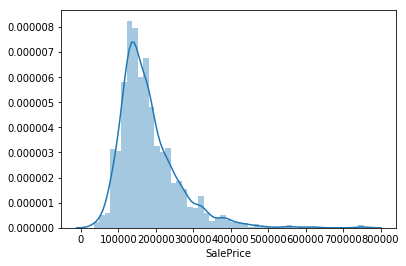

In [10]:
sns.distplot(df_train["SalePrice"]);

**GrLivArea vs Sale Price**

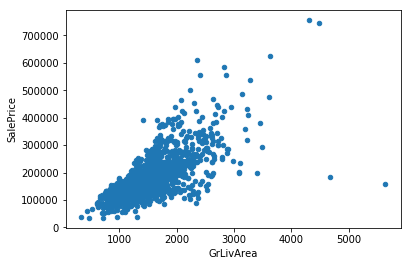

In [11]:
df_train.plot.scatter(x="GrLivArea", y="SalePrice")

**TotalBsmtSF vs Sale Price**

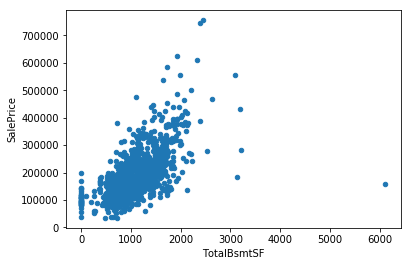

In [12]:
df_train.plot.scatter(x="TotalBsmtSF", y="SalePrice")

#### box plot overallqual/saleprice

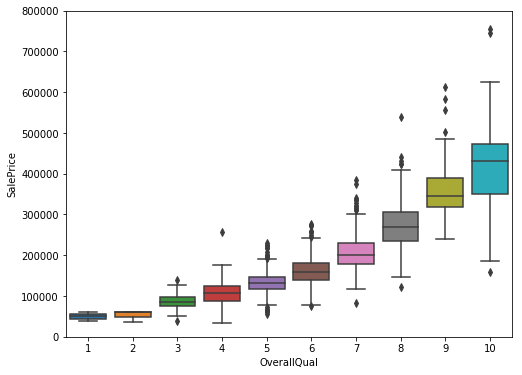

In [13]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#### box plot year built / saleprice

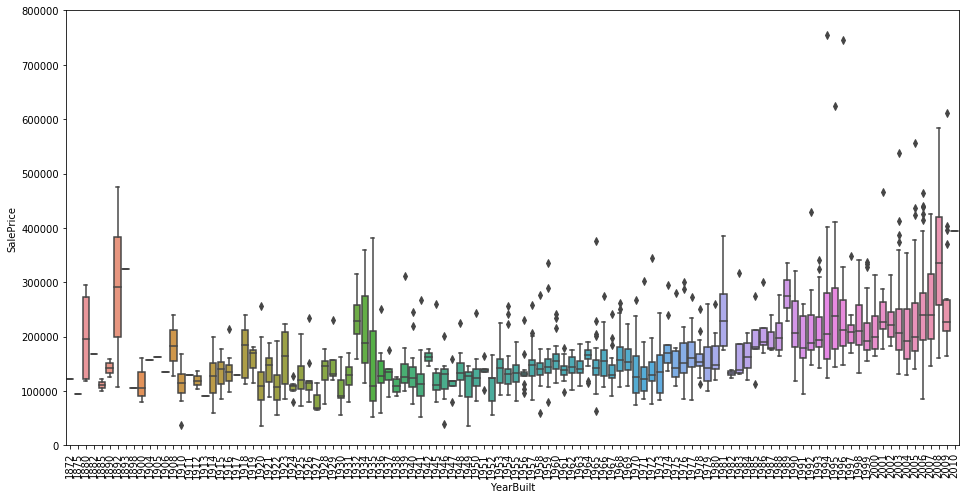

In [14]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

#### correlation matrix

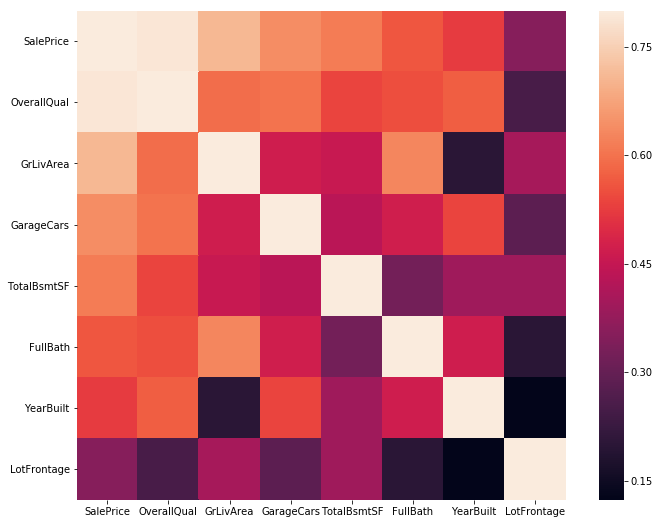

In [11]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#### scatterplot with highly correlated features

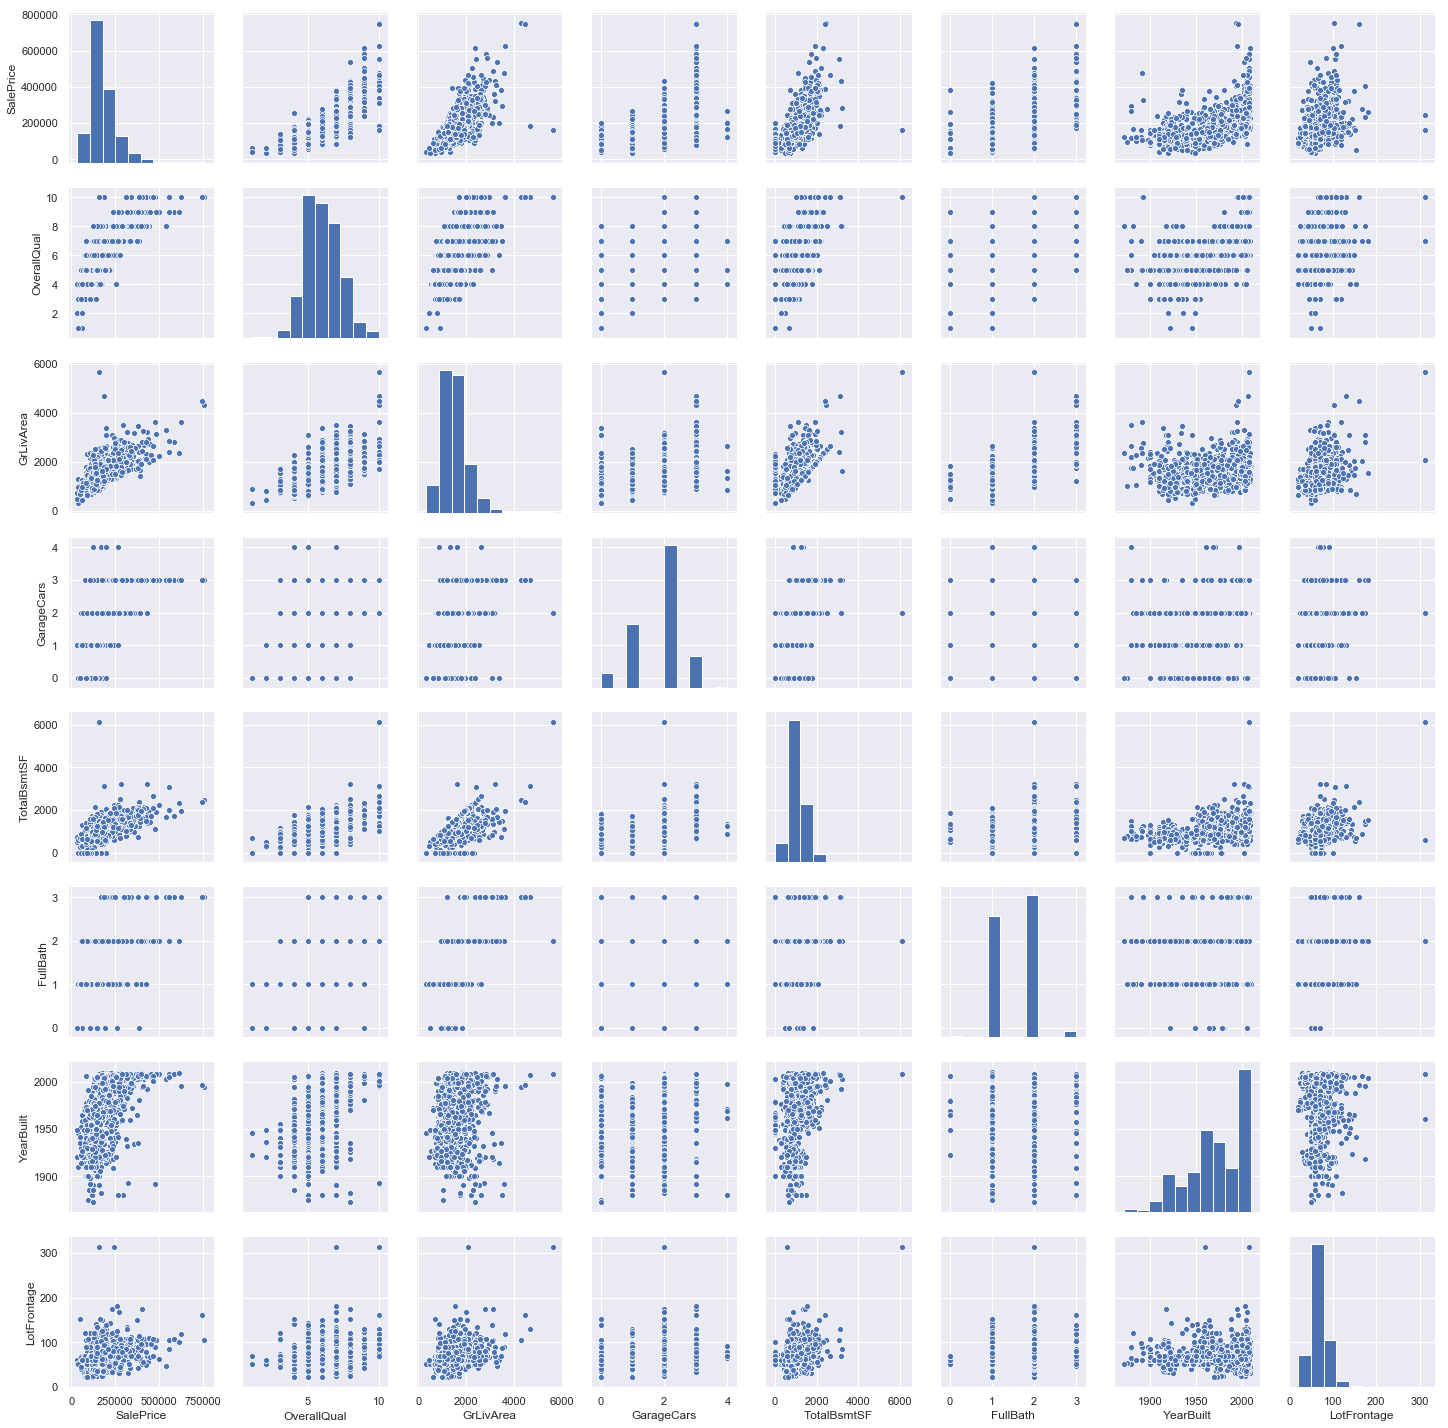

In [46]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'FireplaceQu', 'LotFrontage']
sns.pairplot(df_train[cols], height = 2.5);
plt.show();

#### Missing Data

In [13]:
missing_features = df_train.isnull().sum()

In [14]:
missing_features[missing_features>0]

FireplaceQu    690
LotFrontage    259
dtype: int64

In [17]:
df_train["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [18]:
df_train["FireplaceQu"].fillna("None", inplace=True)

In [19]:
df_train["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [21]:
df_train["LotFrontage"].fillna(df_train.LotFrontage.mean(), inplace=True)

In [22]:
df_train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,FireplaceQu,LotFrontage
0,208500,7,1710,2,856,2,2003,None,65.0
1,181500,6,1262,2,1262,2,1976,TA,80.0
2,223500,7,1786,2,920,2,2001,TA,68.0
3,140000,7,1717,3,756,1,1915,Gd,60.0
4,250000,8,2198,3,1145,2,2000,TA,84.0


In [23]:
df_train_1 = pd.get_dummies(df_train)

In [24]:
df_train_1.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,LotFrontage,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
0,208500,7,1710,2,856,2,2003,65.0,0,0,0,1,0,0
1,181500,6,1262,2,1262,2,1976,80.0,0,0,0,0,0,1
2,223500,7,1786,2,920,2,2001,68.0,0,0,0,0,0,1
3,140000,7,1717,3,756,1,1915,60.0,0,0,1,0,0,0
4,250000,8,2198,3,1145,2,2000,84.0,0,0,0,0,0,1


In [25]:
df_train_1.dtypes

SalePrice             int64
OverallQual           int64
GrLivArea             int64
GarageCars            int64
TotalBsmtSF           int64
FullBath              int64
YearBuilt             int64
LotFrontage         float64
FireplaceQu_Ex        uint8
FireplaceQu_Fa        uint8
FireplaceQu_Gd        uint8
FireplaceQu_None      uint8
FireplaceQu_Po        uint8
FireplaceQu_TA        uint8
dtype: object

### Model

In [26]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
X = df_train_1.iloc[:, 1:]
y = df_train_1.iloc[:, 0]

#### Linear Regression

In [61]:
parameter=[{'fit_intercept':["True", "False"]}]

In [ ]:
LR = LinearRegression(normalize="True")

In [62]:
grid_LR = GridSearchCV(LR, parameter, cv=5)

In [63]:
grid_LR.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize='True'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'fit_intercept': ['True', 'False']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
print("Best score of Linear Regression: ",np.round(grid_LR.best_score_,4) )

Best score of Linear Regression:  0.7631


#### Ridge 

In [29]:
parameter=[{'alpha':[1,2,3,4,5,6,7,8,9,10]}]

In [30]:
RR= Ridge()

In [31]:
grid_RR=GridSearchCV(RR, parameter, cv=8)

In [35]:
grid_RR.fit(X, y)

GridSearchCV(cv=8, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
print("Best score of Ridge: ",np.round(grid_RR.best_score_,4) )

Best score of Ridge:  0.7493


#### Lasso

In [39]:
parameter=[{'alpha':[0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]}]

In [40]:
LSR = Lasso()

In [41]:
grid_LSR=GridSearchCV(LSR, parameter, cv=8)

In [ ]:
grid_LSR.fit(X, y);

In [45]:
print("Best score of Lasso: ",np.round(grid_LSR.best_score_,4) )

Best score of Lasso:  0.7488


#### Elastic Net

In [47]:
parameter=[{"alpha": [0.0001, 0.001, 0.01, 0.1],
            "l1_ratio": np.arange(0.0, 1.0, 0.1)}]

In [48]:
EN = ElasticNet(max_iter=3000,tol=0.1)

In [49]:
grid_EN=GridSearchCV(EN, parameter, cv=8)

In [ ]:
grid_EN.fit(X, y)

In [51]:
print("Best score of Elastic Net: ",np.round(grid_EN.best_score_,4) )

Best score of Elastic Net:  0.7486
